In [1]:
using BasisFunctions
using FrameFuns
using PyPlot

In [2]:
B = FourierBasis(11,-2.0,2.0)
D = Interval(-1.0,1.0)
f(x) = x^2
F = Fun(f,B,D)

A 1-dimensional FrameFun with 11 degrees of freedom.
Basis: Fourier series, mapped to [ -2.0  ,  2.0 ]
Domain: the interval [-1.0, 1.0]


In [3]:
BasisFunctions.derivative_set(B,1)

BasisFunctions.LinearMappedSet{BasisFunctions.FourierBasis{false,Complex{Float64}},Float64,Complex{Float64}}(BasisFunctions.FourierBasis{false,Complex{Float64}}(11),-2.0,2.0)

In [4]:
AD = BasisFunctions.antidifferentiation_operator(B,1)
BasisFunctions.is_diagonal(AD)

Val{true}()

In [5]:
BasisFunctions.diagonal(AD,BasisFunctions.is_diagonal(AD))

11-element Array{Complex{Float64},1}:
  0.0+0.0im     
  0.0-0.63662im 
  0.0-0.31831im 
  0.0-0.212207im
  0.0-0.159155im
  0.0-0.127324im
 -0.0+0.127324im
 -0.0+0.159155im
 -0.0+0.212207im
 -0.0+0.31831im 
 -0.0+0.63662im 

In [6]:
F'

A 1-dimensional FrameFun with 11 degrees of freedom.
Basis: Fourier series, mapped to [ -2.0  ,  2.0 ]
Domain: the interval [-1.0, 1.0]


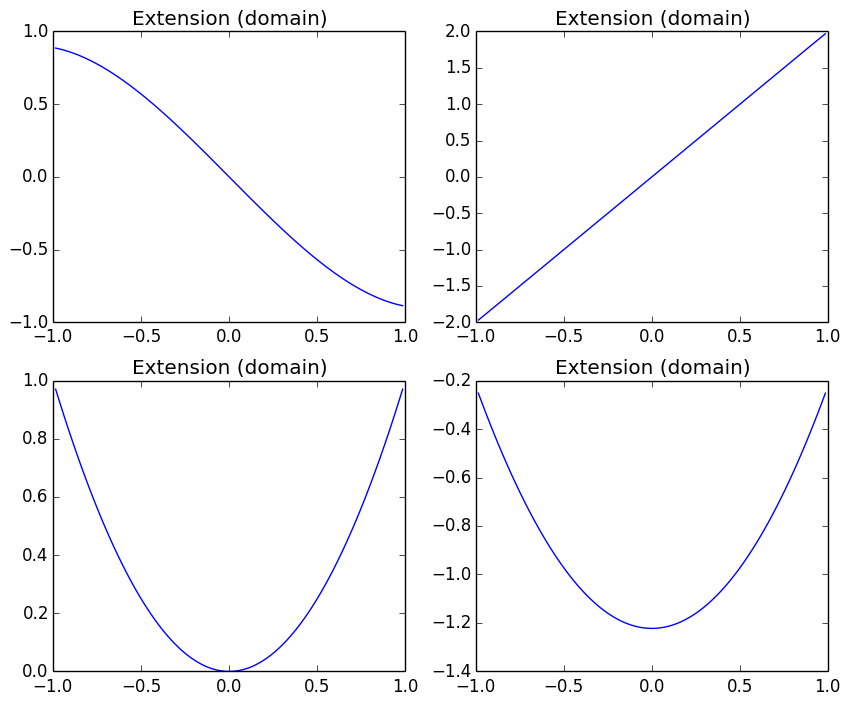

PyObject <matplotlib.text.Text object at 0x3190f7710>

In [7]:
figure(figsize=(10,8))
subplot(221); FrameFuns.plot(∫(F))
subplot(222); FrameFuns.plot(F')
subplot(223); FrameFuns.plot(F)
subplot(224); FrameFuns.plot(∫(F'))

In [8]:
B = FourierBasis(20)⊗ChebyshevBasis(20)
D = Interval(-0.5,0.5)⊗Interval(-0.5,0.5)
f(x,y) = x*y
F = Fun(f,B,D)

A 2-dimensional FrameFun with 400 degrees of freedom.
Basis: tensor product (Fourier series x Chebyshev series (first kind))
Domain: the interval [-0.5, 0.5] x the interval [-0.5, 0.5]


In [9]:
matrix(operator(differentiation_operator(basis(F),(0,1)),1))

21x20 Array{Complex{Float64},2}:
 0.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.5+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.5+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.

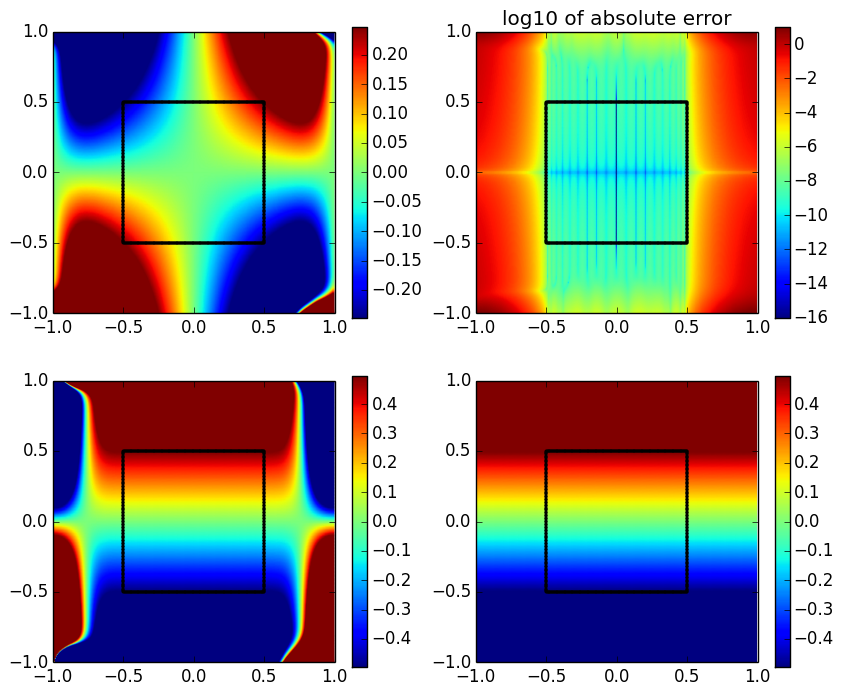

PyObject <matplotlib.colorbar.Colorbar instance at 0x31ddc9c20>

In [12]:
figure(figsize=(10,8))
subplot(221); plot_image(F)
subplot(222); FrameFuns.plot_error(F,f)
subplot(223); plot_image(∂x(F))
subplot(224); plot_image(∂x(F),(x,y)->y)


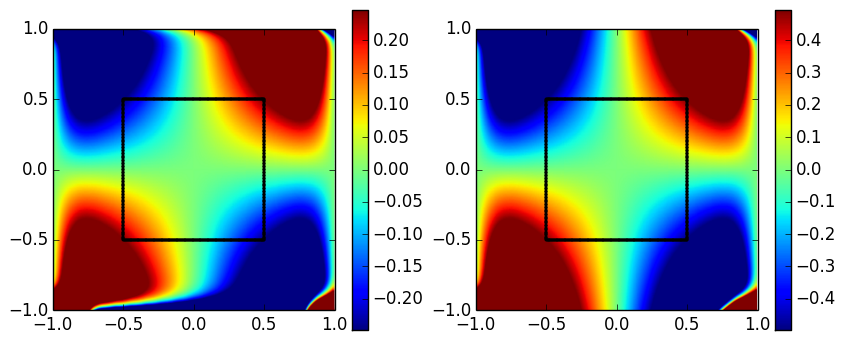

PyObject <matplotlib.colorbar.Colorbar instance at 0x31cd41c68>

In [11]:
figure(figsize=(10,4))
subplot(121); plot_image(∂x(∫∂x(F)))
subplot(122); plot_image(∂y(∫∂y(F)))